# Perceptron Algorithm

## Setup

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:
%matplotlib inline
np.random.seed(42)

## Load Data

In [3]:
df = pd.read_csv("data.csv", header=None)
df.columns = ['x', 'y', 'label']
df.shape

(100, 3)

In [4]:
df.head()

,x,y,label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [5]:
X = df.iloc[:, :2].to_numpy()
y = df.iloc[:, 2].to_numpy()

X.shape, y.shape

((100, 2), (100,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 2), (75,), (25, 2), (25,))

## EDA

In [7]:
df['label'].value_counts()

label
1    50
0    50
Name: count, dtype: int64

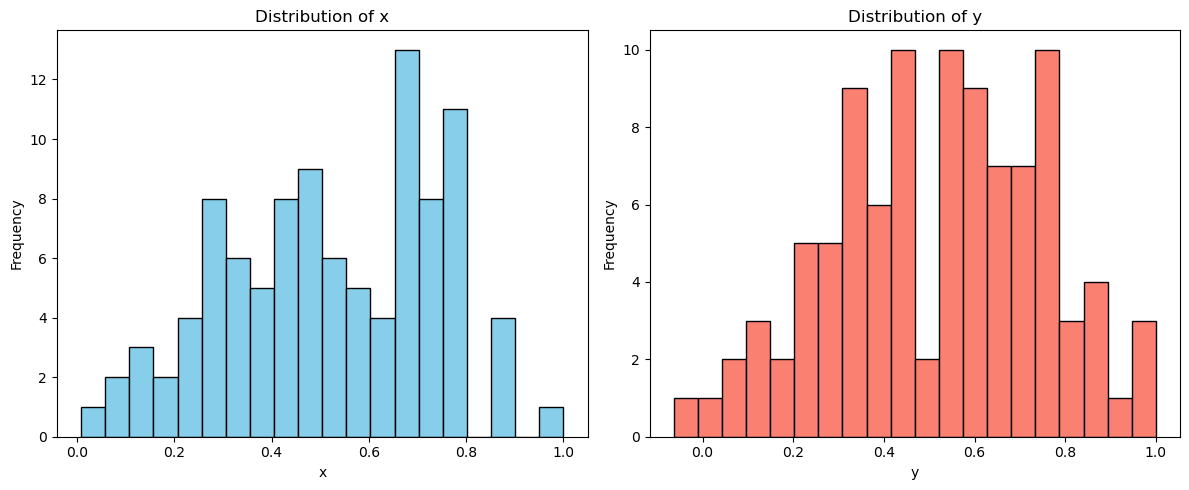

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['x'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of x')
plt.xlabel('x')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['y'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
corr = df.corr()
corr

,x,y,label
x,1.000000,0.625802,-0.767375
y,0.625802,1.000000,-0.769329
label,-0.767375,-0.769329,1.000000


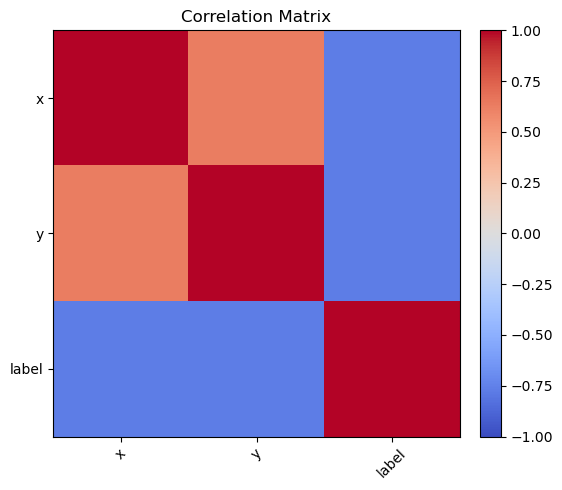

In [10]:
plt.figure(figsize=(6, 5))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

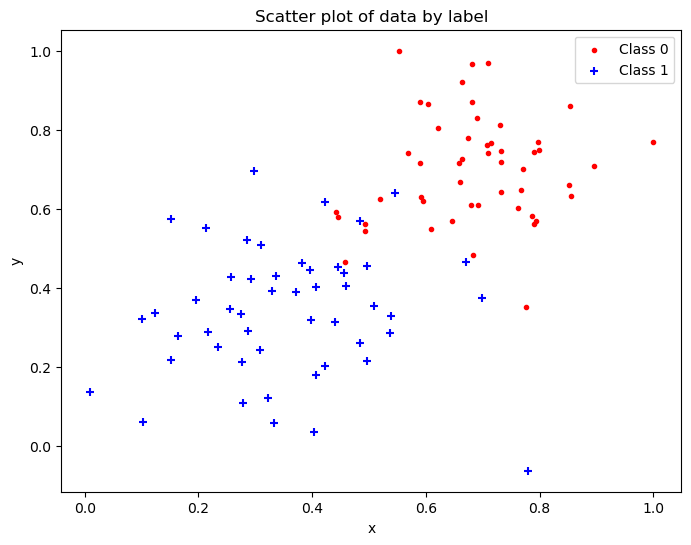

In [11]:
plt.figure(figsize=(8, 6))
for label, color, marker in zip([0, 1], ['red', 'blue'], ['.', '+']):
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], c=color, label=f'Class {label}', marker=marker)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data by label')
plt.legend()
plt.show()

## Algorithm Implementation

In [12]:
def step_func(x):
    return np.where(x >= 0, 1, 0)

In [13]:
class PerceptronExample:
    def __init__(self):
        self.W = None
        self.b = None
        self._weights = []

    def predict(self, X):
        return step_func(np.matmul(X, self.W) + self.b).squeeze()

    def fit(self, X, y, learning_rate=0.1, n_epochs=25):
        self._init(X)
        for i in range(n_epochs):
            self._step(X, y, learning_rate=learning_rate)
        return self
    
    def _init(self, X):
        x_max = max(X.T[0])
        self.W = np.random.rand(2, 1)
        self.b = np.random.rand(1)[0] + x_max
        self._weights = [(self.W, self.b)]

    def _step(self, X, y, learning_rate=0.1):
        y_pred = self.predict(X)
        sign = y - y_pred
        for i in range(len(sign)):
            if sign[i] == 0:
                continue
            for j in range(2):
                self.W[j] += sign[i]*X[i][j]*learning_rate
            self.b += sign[i]*learning_rate
        self._weights.append((self.W, self.b))



## Test and Visualize

In [14]:
perceptron = PerceptronExample()
perceptron.fit(X_train, y_train)

In [15]:
y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f'Train Accuracy: {acc_train:.2f}')
print(f'Test Accuracy : {acc_test:.2f}')

Train Accuracy: 0.93
Test Accuracy : 0.96


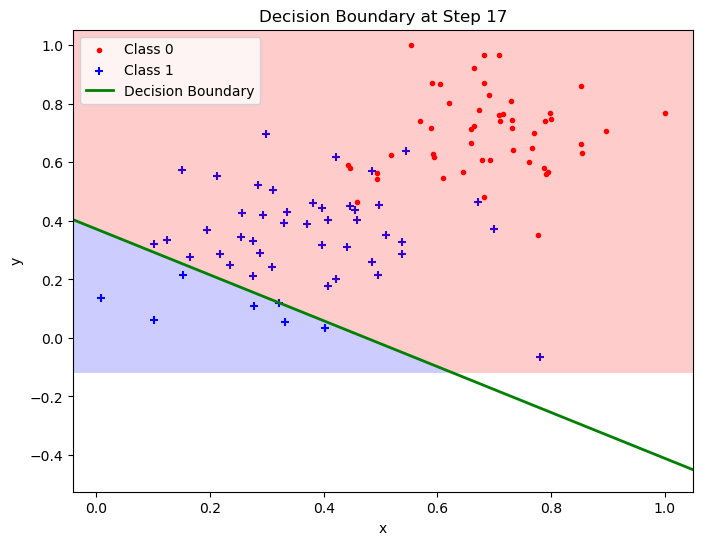

Button(description='Next', style=ButtonStyle())

In [18]:
# Initialize the step index
step_index = 0

def plot_decision_boundary(index):
    # Retrieve weights and bias at the given training step
    W, b = perceptron._weights[index]
    W0 = W[0, 0]
    W1 = W[1, 0]
    
    plt.figure(figsize=(8, 6))
    # Scatter plot for each class
    for label, color, marker in zip([0, 1], ['red', 'blue'], ['.', '+']):
        subset = df[df['label'] == label]
        plt.scatter(subset['x'], subset['y'], c=color, marker=marker, label=f'Class {label}')
    
    ax = plt.gca()
    # Get x limits from current plot
    x_vals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)

    # Plot decision boundary
    if W1 != 0:
        y_vals = -(W0/W1)*x_vals - b/W1
        plt.plot(x_vals, y_vals, 'green', linewidth=2, label='Decision Boundary')
    else:
        # When W1 is zero, the boundary is vertical: x = -b/W0
        x_line = -b/W0
        plt.axvline(x=x_line, color='green', linewidth=2, label='Decision Boundary')
    
    plt.title(f'Decision Boundary at Step {index}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def on_next_click(b):
    global step_index
    if step_index < len(perceptron._weights) - 1:
        step_index += 1
    clear_output(wait=True)
    plot_decision_boundary(step_index)
    display(next_button)

# Create a Next button widget
next_button = widgets.Button(description="Next")
next_button.on_click(on_next_click)

# Display the initial plot and button
plot_decision_boundary(step_index)
display(next_button)